# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Create two new dataframes


In [2]:
# Creating North Call Center DataFrame from "NorthCallCenter" csv

north_df = pd.read_csv("NorthCallCenter.csv")
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [3]:
# Returns a concise summary of the North Call Center (north_df) DataFarme.

north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [4]:
# Returns the column labels/names of the DataFrame

north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [5]:
# Returns the descriptive statistics for each column in the DataFrame

north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [6]:
# Creating South Call Center DataFrame from "SouthCallCenter" csv

south_df = pd.read_csv("SouthCallCenter.csv")
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [7]:
# Returns a concise summary of the South Call Center (south_df) DataFarme.

south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [8]:
# Returns the column labels/names of the DataFrame

south_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [9]:
# Returns the descriptive statistics for each column in the DataFrame

south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [10]:
# EDA Question 1A solution below:

north_df['Rep ID'].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [12]:
# EDA Question 1B solution Below:

south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [11]:
# EDA Question 2A solution Below:

average_values_north_df = north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)
average_values_north_df

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [12]:
# EDA Question 2B solution Below:

average_values_south_df = south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)
average_values_south_df

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [13]:
# EDA Question 3 solution Below:
# To find the number of calls taken for each time block, I need to combine the two dataframes north_df and south_df.
# Below code combines the north_df and south_df dataframes

combined_df = pd.concat((north_df, south_df), axis = 0)

# Below code results in the number of calls taken for each time block(North and South combined)
calls_per_time_block = combined_df['Time Block'].value_counts()
calls_per_time_block

Time Block
12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: count, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [14]:
# Question 1 solution below - 

#### Record your answer below:

> Your Answer: # The 'Incoming Wait Time' column contains 163 null or missing values in the North Call Center dataset and 188 null or missing values in the South Call Center dataset. Upon further exploration, I found that all Incoming calls have Incoming Wait Times, with no missing values in this column. However, all null values correspond to outgoing calls which do not have an Incoming Wait Time. Since these null values are expected for outgoing calls and do not represent missing data, no further steps are required.

In [15]:
# Below code checks for missing data in the North Call Center dataset and results in 163 null values in the 'Incoming Wait Time' column.
print("\nMissing Data in the North Call Center dataset:")
north_df.isna().sum()


Missing Data in the North Call Center dataset:


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [16]:
# To check how many missing values in the 'Incoming Wait Time' column are 'Incoming'. 
# The results show that there are no missing values for 'Incoming' in the 'Incoming Wait Time' column. 
# Therefore, only incoming calls have incoming wait time.

north_df[north_df['Incoming or Outgoing'] == 'Incoming'].isna().sum()

Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64

In [17]:
# To check how many missing values in the 'Incoming Wait Time' column are 'Outgoing'. The results show 163 missing values for 'Outgoing' in 
# the 'Incoming Wait Time' column.

north_df[north_df['Incoming or Outgoing'] == 'Outgoing'].isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [18]:
# Below code checks for missing data in the South Call Center dataset and results in 188 null values in the 'Incoming Wait Time' column.
print("\nMissing Data in the South Call Center dataset:")
south_df.isna().sum()


Missing Data in the South Call Center dataset:


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [19]:
# To check how many missing values in the 'Incoming Wait Time' column are 'Incoming'. 
# The results show that there are no missing values for 'Incoming' in the 'Incoming Wait Time' column. 
# Therefore, only incoming calls have incoming wait time.

south_df[south_df['Incoming or Outgoing'] == 'Incoming'].isna().sum()

Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64

In [20]:
# To check how many missing values in the 'Incoming Wait Time' column are 'Outgoing'. The results show 188 missing values for 'Outgoing' in 
# the 'Incoming Wait Time' column.

south_df[south_df['Incoming or Outgoing'] == 'Outgoing'].isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [21]:
# Cleaning Question 2 solution below:
# Returns the three unique values in the 'Sale' column [['NO', 'YES ', 'YES']
north_df['Sale'].unique() 

array(['NO', 'YES ', 'YES'], dtype=object)

In [22]:
# Returns the value counts for each unique element in a column
north_df['Sale'].value_counts()

Sale
NO      234
YES      10
YES       1
Name: count, dtype: int64

In [23]:
# Returns the 10 rows for the column 'Sale' where the value is 'YES' (without trailing white space)
north_df[north_df['Sale'] == 'YES'] 

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
40,40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
99,99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,NaN,2,1
108,108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,NaN,2,1
220,220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,NaN,3,1
227,227,North,Product Support,4:00 PM,Outgoing,B,Brent,YES,0,0,10,2,NaN,4,1


In [24]:
# Returns the row for the column 'Sale' where the value is 'YES '(with trailing white space)
north_df[north_df['Sale'] == 'YES '] 

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1


In [25]:
# Below code replaces the 'YES ' (with a trailing space) with 'YES' (without the trailing space) in the north_df dataframe. 
north_df['Sale'] = north_df['Sale'].replace('YES ', 'YES')

# Below code returns an array showing the two unique values after the replacement, namely 'NO' and 'YES'.
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: In the 'Sale' column of the North Call Center dataset, there are two different 'YES' values. 'YES' (without the trailing space) and 'YES ' (with the trailing space). There were 10 instances of 'YES' and 1 instance of 'YES '. This issue can happen when data is entered manually or imported.

> To rectify the issue, I replaced 'YES ' (with a trailing space) with 'YES' (without the trailing space) in the north_df dataframe. Then, I used the .unique() function to confiem that the 'Sale' column now contains only two unique values, 'NO' and 'YES'.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [26]:
# Cleaning Question 3 solution below:
# Returns duplicates in North Call Center DataFrame. There are no duplicates in north_df dataframe.

print("\nDuplicates in North Call Center DataFrame (north_df):")
north_df.duplicated().sum()


Duplicates in North Call Center DataFrame (north_df):


np.int64(0)

In [27]:
# Checking for duplicates in South Call Center DataFrame
# Returns duplicates in South Call Center DataFrame. There are no duplicates in south_df dataframe.
print("\nDuplicates in South Call Center DataFrame (south_df):")
south_df.duplicated().sum()


Duplicates in South Call Center DataFrame (south_df):


np.int64(0)

##### Record your answer below:
> Your Answer: To check for duplicates in the North Call Center and South Call Center datasets, I used the .duplicated() function and .sum() function to get the count of duplicate values. When the code was executed with the given functions, the output shows that there are no duplicated rows in both north_df and south_df dataframes. Therefore, no further steps are required.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [28]:
# Cleaning Question 4 solution below:

In [29]:
# During visual exploration of the datasets, I noticed that there is an extra Index column besides the Default index column with zero indexing.
# There are two methods to resolve and get rid of the extra index column.

# FIRST METHOD - While importing the csv file and converting it into a dataframe, run the code below to get rid of the csv index column.
# north_df = pd.read_csv("NorthCallCenter.csv", index_col=0)

# SECOND METHOD - Dropping the column, 'Unnamed: 0'. This results in total 14 columns in the dataset.

new_north_df = north_df.drop(columns=['Unnamed: 0'])
new_north_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [30]:
# Dropping the column, namely 'Unnamed: 0'. This results in total 14 columnsin the dataset.

new_south_df = south_df.drop(columns=['Unnamed: 0'])
new_south_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


##### Record your answer below:
> Your Answer: In the North Call Center and South Call Center datasets, the 'Unnamed: 0' column is unnecessary since it is the same as the DataFrame's default index column. The column does not provide any significant information for our analysis. Therefore, i have dropped it.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [31]:
# Create dataframe for the entire company named df
# Following data cleaning in Task 2, the dataset 'north_df' has been renamed to 'new_north_df' and 'south_df' has been renamed to
# 'new_south_df'. The parameter ignore_index=True reset the index after concatenating the two dataframes and resulted in a new sequential 
# index (starting from 0 to 558) for the combined dataframe 'df'.

df = pd.concat([new_north_df, new_south_df], ignore_index=True)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [32]:
# Manipulation Question solution below:
# Below code returns that in the North Branch, Brent has the highest number of calls which is 37.

highest_calls_by_rep_north_branch = new_north_df.groupby(['Rep ID', 'Branch'])['Calls'].sum().sort_values(ascending = False)
print("Highest number of calls by rep in North Branch:\n", highest_calls_by_rep_north_branch)

# Below code returns that in the South Branch, Eric has the highest number of calls which is 35.

highest_calls_by_rep_south_branch = new_south_df.groupby(['Rep ID', 'Branch'])['Calls'].sum().sort_values(ascending = False)
print("Highest number of calls by rep in South Branch:\n", highest_calls_by_rep_south_branch)


Highest number of calls by rep in North Branch:
 Rep ID  Branch
Brent   North     37
Lilly   North     30
Duke    North     29
Todd    North     29
Joe     North     26
Cam     North     24
Xander  North     24
Amanda  North     23
Andy    North     23
Name: Calls, dtype: int64
Highest number of calls by rep in South Branch:
 Rep ID  Branch
Eric    South     35
Randy   South     33
Sandy   South     32
Helga   South     31
George  South     29
Kate    South     29
Karl    South     28
Josh    South     26
Susan   South     26
Sharon  South     25
Alice   South     20
Name: Calls, dtype: int64


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent has the highest number of calls totalling 37.
- South Branch = Eric has the highest number of calls totalling 35.

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [33]:
# Manipulation Question 2 solution below:
# FIRST METHOD
# # Below code returns the Average Call Abandonement Rate for North Branch

avg_call_abandonement_rate_north_branch = round(new_north_df['Abandoned'].mean() * 100, 2)
print("Average Call Abandonement Rate for North Branch:\n", avg_call_abandonement_rate_north_branch)

# # Below code returns the Average Call Abandonement Rate for South Branch

avg_call_abandonement_rate_south_branch = round(new_south_df['Abandoned'].mean() * 100, 2)
print("Average Call Abandonement Rate for South Branch:\n", avg_call_abandonement_rate_south_branch)

# # Below code returns the Average Call Abandonement Rate Company wide

avg_call_abandonement_rate_company_wide = round(df['Abandoned'].mean() * 100, 2)
print("Average Call Abandonement Rate Company Wide:\n", avg_call_abandonement_rate_company_wide)


Average Call Abandonement Rate for North Branch:
 2.86
Average Call Abandonement Rate for South Branch:
 1.27
Average Call Abandonement Rate Company Wide:
 1.97


In [34]:
# SECOND METHOD

# NORTH BRANCH
# Below code returns the total number of abandoned calls for North Branch. The 'Abandoned' column has two unique values, 0 and 1.
# I have assumed that 1 means the call was abandoned and 0 means the call was not abandoned.

abandoned_calls_north_branch = new_north_df.groupby(['Abandoned', 'Branch'])['Calls'].sum()
print("Abandoned Calls for North Branch:\n", abandoned_calls_north_branch)

# Below code returns the total number of calls for North Branch

total_calls_north_branch = new_north_df['Calls'].sum()
print("Total Calls for North Branch:\n", total_calls_north_branch)

# Calculate average call abandonement rate. Rounding the average rate to the nearest hundreth. 

avg_call_abandonement_rate_north_branch = round(abandoned_calls_north_branch / total_calls_north_branch * 100, 2)
print("Average call Abandonement Rate for North Branch:\n", avg_call_abandonement_rate_north_branch)

# SOUTH BRANCH
# Below code returns the total number of abandoned calls for South Branch. The 'Abandoned' column has two unique values, 0 and 1.
# I have assumed that 1 means the call was abandoned and 0 means the call was not abandoned.

abandoned_calls_south_branch = new_south_df.groupby(['Abandoned', 'Branch'])['Calls'].sum()
print("Abandoned Calls for South Branch:\n", abandoned_calls_south_branch)

# Below code returns the total number of calls for South Branch

total_calls_south_branch = new_south_df['Calls'].sum()
print("Total Calls for South Branch:\n", total_calls_south_branch)

# Calculate average call abandonement rate. Rounding the average rate to the nearest hundreth.

avg_call_abandonement_rate_south_branch = round(abandoned_calls_south_branch / total_calls_south_branch * 100, 2)
print("Average call Abandonement Rate for South Branch:\n", avg_call_abandonement_rate_south_branch)

# COMPANY WIDE
# Below code returns the total number of abandoned calls for South Branch

abandoned_calls_company_wide = df.groupby(['Abandoned'])['Calls'].sum()
print("Abandoned Calls Company Wide:\n", abandoned_calls_company_wide)

# Below code returns the total number of calls Company Wide

total_calls_company_wide = df['Calls'].sum()
print("Total Calls Company Wide:\n", total_calls_company_wide)

# calculate average call abandonement rate 
avg_call_abandonement_rate_company_wide = round(abandoned_calls_company_wide / total_calls_company_wide * 100, 2)
print("Average call Abandonement Rate Company Wide:\n", avg_call_abandonement_rate_company_wide)


Abandoned Calls for North Branch:
 Abandoned  Branch
0          North     238
1          North       7
Name: Calls, dtype: int64
Total Calls for North Branch:
 245
Average call Abandonement Rate for North Branch:
 Abandoned  Branch
0          North     97.14
1          North      2.86
Name: Calls, dtype: float64
Abandoned Calls for South Branch:
 Abandoned  Branch
0          South     310
1          South       4
Name: Calls, dtype: int64
Total Calls for South Branch:
 314
Average call Abandonement Rate for South Branch:
 Abandoned  Branch
0          South     98.73
1          South      1.27
Name: Calls, dtype: float64
Abandoned Calls Company Wide:
 Abandoned
0    548
1     11
Name: Calls, dtype: int64
Total Calls Company Wide:
 559
Average call Abandonement Rate Company Wide:
 Abandoned
0    98.03
1     1.97
Name: Calls, dtype: float64


In [35]:
# THIRD METHOD
# Below code returns the Average Call Abandonement Rate for North Branch

avg_call_abandonement_rate_north_branch = round(new_north_df.groupby(['Branch'])['Abandoned'].mean() * 100, 2)
print("Average Call Abandonement Rate for North Branch:\n", avg_call_abandonement_rate_north_branch)

# Below code returns the Average Call Abandonement Rate for South Branch

avg_call_abandonement_rate_south_branch = round(new_south_df.groupby(['Branch'])['Abandoned'].mean() * 100, 2)
print("Average Call Abandonement Rate for South Branch:\n", avg_call_abandonement_rate_south_branch)

# # Below code returns the Average Call Abandonement Rate Company Wide

avg_call_abandonement_rate_company_wide = round(df['Abandoned'].mean() * 100, 2)
print("Average Call Abandonement Rate Company Wide:\n", avg_call_abandonement_rate_company_wide)

Average Call Abandonement Rate for North Branch:
 Branch
North    2.86
Name: Abandoned, dtype: float64
Average Call Abandonement Rate for South Branch:
 Branch
South    1.27
Name: Abandoned, dtype: float64
Average Call Abandonement Rate Company Wide:
 1.97


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? The South Branch and Company Wide rates fall outside of the optimal range with 1.27% and 1.97% respectively. The North Branch is within the range with 2.86%.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [36]:
# Manipulation Question 3 solution below:
# NORTH BRANCH

# Return total number of incoming calls in the 'Incoming or Outgoing' column.

incoming_calls_north_branch = new_north_df.groupby(['Incoming or Outgoing'])['Calls'].count()
print("Total number of incoming calls for North Branch:\n", incoming_calls_north_branch)

# Returns the total number of incoming calls answered within 2 seconds

calls_within_two_seconds_north_branch = new_north_df[new_north_df['Incoming Wait Time'] <= 2]['Calls'].sum()
print("Total number of incoming calls answered within 2 seconds for North Branch:\n", calls_within_two_seconds_north_branch)

# Calculates the percentage of calls answered within 2 seconds for North Branch

percentage_calls_answered_north_branch = round(calls_within_two_seconds_north_branch / incoming_calls_north_branch * 100, 2)
print("Percentage of calls answered within 2 seconds for North Branch:\n", percentage_calls_answered_north_branch)

Total number of incoming calls for North Branch:
 Incoming or Outgoing
Incoming     82
Outgoing    163
Name: Calls, dtype: int64
Total number of incoming calls answered within 2 seconds for North Branch:
 33
Percentage of calls answered within 2 seconds for North Branch:
 Incoming or Outgoing
Incoming    40.24
Outgoing    20.25
Name: Calls, dtype: float64


In [37]:
# SOUTH BRANCH

# Return total number of incoming calls in the 'Incoming or Outgoing' column.

incoming_calls_south_branch = new_south_df.groupby(['Incoming or Outgoing'])['Calls'].count()
print("Total number of incoming calls for South Branch:\n", incoming_calls_south_branch)

# Returns the total number of incoming calls answered within 2 seconds

calls_within_two_seconds_south_branch = new_south_df[new_south_df['Incoming Wait Time'] <= 2]['Calls'].sum()
print("Total number of incoming calls answered within 2 seconds for South Branch:\n", calls_within_two_seconds_south_branch)

# Calculates the percentage of calls answered within 2 seconds for South Branch

percentage_calls_answered_south_branch = round(calls_within_two_seconds_south_branch / incoming_calls_south_branch * 100, 2)
print("Percentage of calls answered within 2 seconds for South Branch:\n", percentage_calls_answered_south_branch)

Total number of incoming calls for South Branch:
 Incoming or Outgoing
Incoming    126
Outgoing    188
Name: Calls, dtype: int64
Total number of incoming calls answered within 2 seconds for South Branch:
 48
Percentage of calls answered within 2 seconds for South Branch:
 Incoming or Outgoing
Incoming    38.10
Outgoing    25.53
Name: Calls, dtype: float64


In [38]:
# COMPANY WIDE

# Return total number of incoming calls in the 'Incoming or Outgoing' column.

incoming_calls_company_wide = df.groupby(['Incoming or Outgoing'])['Calls'].count()
print("Total number of incoming calls Company Wide:\n", incoming_calls_company_wide)

# # Returns the total number of incoming calls answered within 2 seconds

calls_within_two_seconds_company_wide = df[df['Incoming Wait Time'] <= 2]['Calls'].sum()
print("Total number of incoming calls answered within 2 seconds Company Wide:\n", calls_within_two_seconds_company_wide)

# # Calculates the percentage of calls answered within 2 seconds Company Wide

percentage_calls_answered_company_wide = round(calls_within_two_seconds_company_wide / incoming_calls_company_wide * 100, 2)
print("Percentage of calls answered within 2 seconds Company Wide:\n", percentage_calls_answered_company_wide)

Total number of incoming calls Company Wide:
 Incoming or Outgoing
Incoming    208
Outgoing    351
Name: Calls, dtype: int64
Total number of incoming calls answered within 2 seconds Company Wide:
 81
Percentage of calls answered within 2 seconds Company Wide:
 Incoming or Outgoing
Incoming    38.94
Outgoing    23.08
Name: Calls, dtype: float64


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = Percentage of incoming calls answered within 2 seconds is 40.24% and 33 calls.
- South Branch = Percentage of incoming calls answered within 2 seconds is 38.10% and 48 calls.
- Company Wide = Percentage of incoming calls answered within 2 seconds is 38.94% and 81 calls.

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [39]:
# Manipulation Question 4 solution below:
# NORTH BRANCH

avg_speed_answer_north_branch = new_north_df['Incoming Wait Time'].mean().round(2)
print("Average speed of answer (in seconds) for North Branch:\n", avg_speed_answer_north_branch)

# SOUTH BRANCH

avg_speed_answer_south_branch = new_south_df['Incoming Wait Time'].mean().round(2)
print("Average speed of answer (in seconds) for South Branch:\n", avg_speed_answer_south_branch)

# COMPANY WIDE

avg_speed_answer_company_wide = df['Incoming Wait Time'].mean().round(2)
print("Average speed of answer (in seconds) Company Wide:\n", avg_speed_answer_company_wide)


Average speed of answer (in seconds) for North Branch:
 3.05
Average speed of answer (in seconds) for South Branch:
 3.0
Average speed of answer (in seconds) Company Wide:
 3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.0 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

In [42]:

pd.set_option('future.no_silent_downcasting', True)

/var/folders/gf/kh6dhsvj14z2n27lpwwwln0m0000gn/T/ipykernel_15239/3376505815.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] * 100


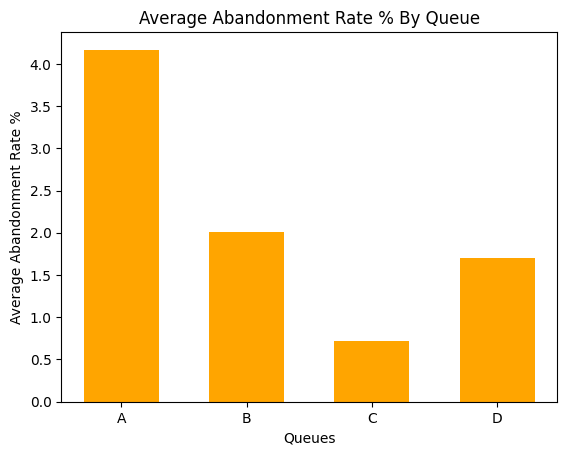

In [61]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] * 100
rates = abandonment_rates.values()

#Your code below:
# # I created a Vertical Bar Chart using Matplotlib

plt.bar(queues, rates, width = 0.6, color = 'orange')
plt.title("Average Abandonment Rate % By Queue")
plt.xlabel("Queues")
plt.ylabel("Average Abandonment Rate %")
plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose a Vertical Bar Chart titled 'Average Abandonment Rate by Queue' to show the abandonment rate for each queue, namely A, B, C and D. This chart is suitable because it shows direct comparision of the values in each queue, which makes it easier to see which queue has the highest and lowest abandonment rate.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

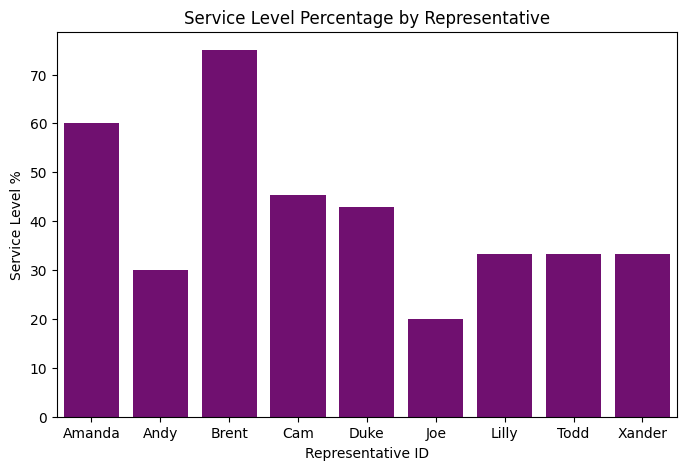

In [45]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = new_north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = new_north_df[new_north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = new_north_df[new_north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table 

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level["Service Level %"]

#Your Code Here: For visualization of Service Level Percentage by Representative, I created a Barplot using Seaborn.

plt.figure(figsize=(8, 5))
sns.barplot(data=service_level, x = 'Rep ID', y = 'Service Level %', color = 'purple')
plt.title("Service Level Percentage by Representative")
plt.xlabel("Representative ID")
plt.ylabel("Service Level %")
plt.show()

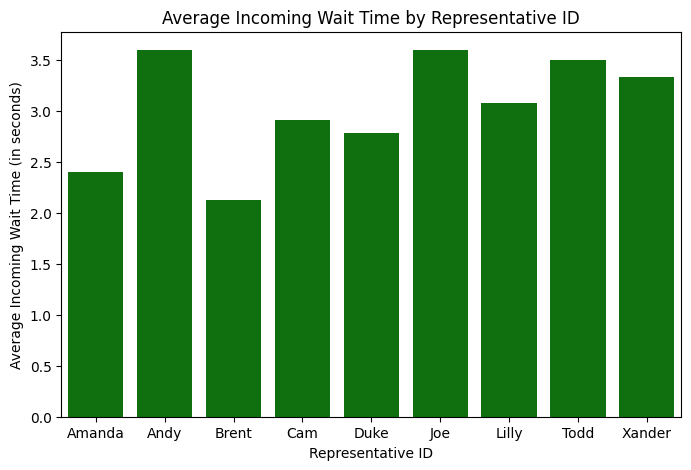

In [44]:
#Your Code Here: For visualization of Average Incoming Wait Time by Representative ID, I created a Barplot using Seaborn.
plt.figure(figsize=(8, 5))
sns.barplot(data=north_plt, x = 'Rep ID', y = 'Incoming Wait Time', color = 'green')
plt.title("Average Incoming Wait Time by Representative ID")
plt.xlabel("Representative ID")
plt.ylabel("Average Incoming Wait Time (in seconds)")
plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


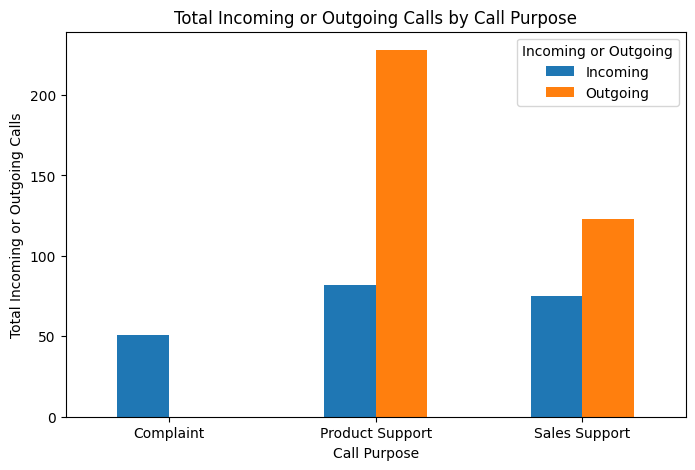

In [43]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
# Pivot the DataFrame to prepare data for the multiple bar chart
df_pivot = df.pivot_table(index='Call Purpose', columns='Incoming or Outgoing', values='Calls', aggfunc='sum')

# Plotting the multiple bar chart
df_pivot.plot(kind='bar', figsize=(8, 5))

# Add labels and title
plt.xlabel('Call Purpose')
plt.ylabel('Total Incoming or Outgoing Calls')
plt.title('Total Incoming or Outgoing Calls by Call Purpose')

# Display the plot
plt.xticks(rotation=0)
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a multiple or grouped bar chart for visualizing the number of incoming and outgoing calls for each call purpose (i.e. Complaint, Product Support or Sales Support) because I can compare Incoming and Outgoing Calls side by side for each call purpose. This makes it easier to see the difference in total calls for each purpose.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> YOUR ANSWER: In order to determine which branch is operating more efficiently, I would like to evaluate the performance of the North Branch and the South Branch by using the KPI’S (Key Performance Indicators) - Average Call Abandonment Rate, Service Level Percentage and Average Speed of Answering Calls. I would also like to consider the number of representatives in both the branches in my evaluation.

AVERAGE CALL ABANDONMENT RATE [Abandoned calls are calls where the customer hangs up due to long call wait times.]
The North Branch’s average call abandonment rate is 2.86% which falls within the optimal range of 2-5%. A high abandonment rate indicates that the customers may be experiencing longer wait times.
The South Branch’s average call abandonment rate is 1.27% which is below the optimal range of 2-5%, which indicates great performance in terms of managing call wait times, handling calls efficiently and better customer satisfaction since fewer customers are hanging up due to long call wait times.

SERVICE LEVEL [Service level is the percentage of calls answered within a specified number of seconds. For this call center, the ideal time frame is 2 seconds.]
The North Branch’s service level is 40.24% with 33 calls. There are 9 representatives in the branch.
The South Branch’s service level is 38.10% with 48 calls. There are 11 representatives in the branch. 
The North Branch is slightly more efficient compared to South Branch in terms of accomplishing the ideal time frame of 2 seconds. The higher service level performance indicates that the North Branch is managing its call volume more efficiently than the South branch in spite of their smaller staff size (i.e. 9 representatives in North Branch versus 11 representatives in South Branch).

AVERAGE SPEED OF ANSWERING CALLS
North Branch: 3.05 seconds
South Branch: 3.0 seconds
The South Branch is faster in answering calls by a small margin of 0.05 seconds compared to the North Branch. However, the difference is negligible.

> CONCLUSION: THE NORTH BRANCH IS ANSWERING A HIGHER PERCENTAGE OF CALLS WITHIN THE IDEAL TIME FRAME OF 2 SECONDS, HAS BETTER SERVICE LEVEL PERFORMANCE AND MAINTAINS AN ABANDONMENT RATE WITHIN OPTIMUM LEVELS, DESPITE HAVING FEWER REPRESENTATIVES. THEREFORE, NORTH BRANCH IS MORE EFFICIENT THAN SOUTH BRANCH.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> YOUR ANSWER: The South Branch’s service level is lower than the North Branch suggesting that they are struggling more to meet the ideal time frame of 2 seconds which is an important KPI. 
South Branch had a total of 126 incoming calls, 48 calls were answered within 2 seconds by 11 employees. Each representative handled an average of 4.36 calls within 2 seconds (i.e. Calls answered within 2 seconds divided by the number of representatives). The North Branch had a total of 82 incoming calls, 33 calls were answered within 2 seconds by 9 employees. Each representative handled an average of 3.67 calls within 2 seconds. The South Branch representatives handled more calls on an average within 2 seconds. This could indicate that the South Branch staff is more stretched and could benefit from additional help to lighten the load.
> THEREFORE, SOUTH BRANCH WOULD BENEFIT FROM THE EXTRA HELP.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Additional information that could be helpful for a  better understanding of efficiency of the North and South Branch are:

CUSTOMER SATISFACTION RATINGS -  As a data analyst, customer satisfaction ratings would help to see if long wait times or abandoned call rate are linked to poor customer experiences. 

REPRESENTATIVES PERFORMANCE METRICS - Knowing representatives individual experience and efficiency will help analyze which representatives are struggling with long wait times, high abandonment rates. This metric would be helpful to assess training needs for such representatives which will eventually impact the overall branch performance.

CALL DURATION - By understanding how long each call lasts on an average will help assess the efficiency of handling calls for different purposes (complaint, product support, sales support). 



## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [55]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]


# Use groupby to plot based on time blocks: Aggregating the data
call_times = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]).sum()
call_times

# Create a pivot table from the aggregated data

# Use groupby and get_group to select which call purpose to plot:

Empty DataFrame
Columns: []
Index: [(10:00 AM, Complaint, Incoming, 1), (10:00 AM, Product Support, Incoming, 1), (10:00 AM, Product Support, Outgoing, 1), (10:00 AM, Sales Support, Incoming, 1), (10:00 AM, Sales Support, Outgoing, 1), (11:00 AM, Complaint, Incoming, 1), (11:00 AM, Product Support, Incoming, 1), (11:00 AM, Product Support, Outgoing, 1), (11:00 AM, Sales Support, Incoming, 1), (11:00 AM, Sales Support, Outgoing, 1), (12:00 PM, Complaint, Incoming, 1), (12:00 PM, Product Support, Incoming, 1), (12:00 PM, Product Support, Outgoing, 1), (12:00 PM, Sales Support, Incoming, 1), (12:00 PM, Sales Support, Outgoing, 1), (1:00 PM, Complaint, Incoming, 1), (1:00 PM, Product Support, Incoming, 1), (1:00 PM, Product Support, Outgoing, 1), (1:00 PM, Sales Support, Incoming, 1), (1:00 PM, Sales Support, Outgoing, 1), (2:00 PM, Complaint, Incoming, 1), (2:00 PM, Product Support, Incoming, 1), (2:00 PM, Product Support, Outgoing, 1), (2:00 PM, Sales Support, Incoming, 1), (2:00 PM, Sales Support, Outgoing, 1), (3:00 PM, Complaint, Incoming, 1), (3:00 PM, Product Support, Incoming, 1), (3:00 PM, Product Support, Outgoing, 1), (3:00 PM, Sales Support, Incoming, 1), (3:00 PM, Sales Support, Outgoing, 1), (4:00 PM, Complaint, Incoming, 1), (4:00 PM, Product Support, Incoming, 1), (4:00 PM, Product Support, Outgoing, 1), (4:00 PM, Sales Support, Incoming, 1), (4:00 PM, Sales Support, Outgoing, 1), (5:00 PM, Complaint, Incoming, 1), (5:00 PM, Product Support, Incoming, 1), (5:00 PM, Product Support, Outgoing, 1), (5:00 PM, Sales Support, Outgoing, 1), (9:00 AM, Complaint, Incoming, 1), (9:00 AM, Product Support, Outgoing, 1)]